In [34]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
raw = pd.read_csv("C:/Users/vlrms/Desktop/전기차/ElectricCarData_Clean_Me.csv")
raw

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,460,70.0,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,45.0,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,75.0,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,74.0,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,28.5,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Nissan,Ariya 63kWh,7.5,160,330,63.0,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
98,Audi,e-tron S Sportback 55 quattro,4.5,210,335,86.5,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
99,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,63.0,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
100,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,87.0,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [36]:
print(np.shape(raw)) #행 102개 열 15개 

(102, 15)


In [37]:
print(raw.isnull().sum()) # 각 행의 결측값을 더해보니 0이 나왔다. 즉, 결측값이 없습니다. 

Brand               0
Model               0
AccelSec            0
TopSpeed_KmH        0
Range_Km            0
Battery_Pack Kwh    0
Efficiency_WhKm     0
FastCharge_KmH      0
RapidCharge         0
PowerTrain          0
PlugType            0
BodyStyle           0
Segment             0
Seats               0
PriceEuro           0
dtype: int64


In [38]:
raw.dtypes

Brand                object
Model                object
AccelSec            float64
TopSpeed_KmH          int64
Range_Km              int64
Battery_Pack Kwh    float64
Efficiency_WhKm       int64
FastCharge_KmH        int64
RapidCharge          object
PowerTrain           object
PlugType             object
BodyStyle            object
Segment              object
Seats                 int64
PriceEuro             int64
dtype: object

Brand	Model	RapidCharge	PowerTrain	PlugType	BodyStyle	Segment

array([[<AxesSubplot:title={'center':'AccelSec'}>,
        <AxesSubplot:title={'center':'TopSpeed_KmH'}>,
        <AxesSubplot:title={'center':'Range_Km'}>],
       [<AxesSubplot:title={'center':'Battery_Pack Kwh'}>,
        <AxesSubplot:title={'center':'Efficiency_WhKm'}>,
        <AxesSubplot:title={'center':'FastCharge_KmH'}>],
       [<AxesSubplot:title={'center':'Seats'}>,
        <AxesSubplot:title={'center':'PriceEuro'}>, <AxesSubplot:>]],
      dtype=object)

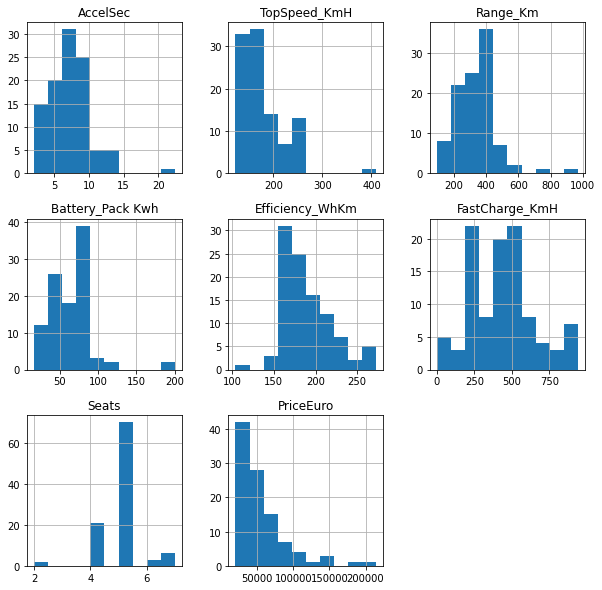

In [39]:
raw.hist(figsize=(10,10))

In [40]:
drop_model = raw.drop(labels="Model", axis=1)

drop_model.head()  # model을 일단 제외시킴. x데이터로서 기능하게 할 예정임. 

,Brand,AccelSec,TopSpeed_KmH,Range_Km,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,4.6,233,460,70.0,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,10.0,160,270,45.0,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,4.7,210,400,75.0,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,6.8,180,360,74.0,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,9.5,145,170,28.5,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Nissan,7.5,160,330,63.0,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
98,Audi,4.5,210,335,86.5,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
99,Nissan,5.9,200,325,63.0,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
100,Nissan,5.1,200,375,87.0,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [58]:
model = raw["Model"]

model

0        Model 3 Long Range Dual Motor
1                            ID.3 Pure
2                                    2
3                                  iX3
4                                    e
                    ...               
97                         Ariya 63kWh
98       e-tron S Sportback 55 quattro
99                 Ariya e-4ORCE 63kWh
100    Ariya e-4ORCE 87kWh Performance
101                  M-Byte 95 kWh 2WD
Name: Model, Length: 102, dtype: object

In [60]:
# 라벨 인코더로 하나씩 int형으로 바꿔주기 

from sklearn.preprocessing import LabelEncoder
classle = LabelEncoder() #class label

# Brand	Model	RapidCharge	PowerTrain	PlugType	BodyStyle	Segment

model = classle.fit_transform(model)

print(model)

[ 47  34   0 101  79   4  85  83  49  63  22  40  39 100  36  33  70  90
  75  12  13  54  24  93  48  35  31  74  98  82  91  88  77  16  45  41
  73  97  78  21  50  38  96  11  46  17   5  66  61  72  92  64  56  26
  52  80   1  71  84  51  76  55   7  29  58  67  86  14  37  57  99  27
  68  44  65  87  62  18  59  69  30  53  20  60  23   3  15  81  28  25
  94  19   9   2  32  89  42   6  95   8  10  43]


In [61]:
#전체 데이터를 학습과 테스트 데이터셋으로 분리
from sklearn.model_selection import train_test_split

#X(입력변수)와 y(종속변수)로 이루어진 데이터를 학습과 테스트 데이터넷으로 각각 70%, 30%의 비율로 나눔
X_train,X_test,y_train,y_test=train_test_split(drop_model, model, test_size=0.3, random_state=1, stratify=y) 

ValueError: Found array with dim 3. Estimator expected <= 2.